<a href="https://colab.research.google.com/github/tajrink/cisc-3440/blob/main/ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# Retrieve the covertype dataset from SKLearn
data = fetch_covtype()

In [ ]:
X = data.data

# For the covertype data, the classes are labeled 1-7.
# This will cause problems with Keras, since it expects
# class labels to start at 0. We can fix it by subtracting 1
# from the labels.
y = data.target - 1

In [ ]:
#necessary preprocessing steps on the data ?

In [ ]:
df_target = pd.DataFrame(y)
df_target.value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
dtype: int64

In [ ]:
print(data.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

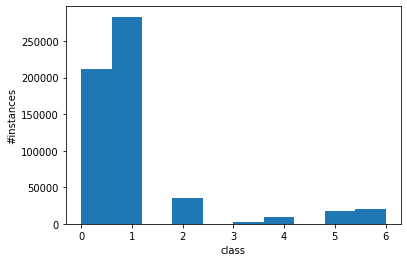

In [ ]:
plt.figure()
plt.hist(y)
plt.ylabel('#instances')
plt.xlabel('class')
plt.show()

In [ ]:
data.data.shape

(581012, 54)

In [ ]:
#create appropriate train, test, and validation splits
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.95, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [ ]:
X_train.shape

(29050, 54)

In [ ]:
X_valid.shape

(275981, 54)

In [ ]:
X_test.shape

(275981, 54)

In [ ]:
#scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [ ]:
#random forest classifier
rfc=RandomForestClassifier(n_estimators=1000,max_depth=5)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
#classification report
print(metrics.classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      0.72      0.69    100624
           1       0.71      0.77      0.74    134568
           2       0.59      0.61      0.60     16983
           3       0.00      0.00      0.00      1305
           4       0.00      0.00      0.00      4509
           5       0.00      0.00      0.00      8250
           6       0.00      0.00      0.00      9742

    accuracy                           0.68    275981
   macro avg       0.28      0.30      0.29    275981
weighted avg       0.62      0.68      0.65    275981



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#validation

In [ ]:
y_pred = rfc.predict(X_valid)

In [ ]:
print(metrics.classification_report(y_valid,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      0.72      0.69    100624
           1       0.71      0.78      0.74    134568
           2       0.59      0.60      0.60     16983
           3       0.00      0.00      0.00      1305
           4       0.00      0.00      0.00      4509
           5       0.00      0.00      0.00      8249
           6       0.00      0.00      0.00      9743

    accuracy                           0.68    275981
   macro avg       0.28      0.30      0.29    275981
weighted avg       0.62      0.68      0.65    275981



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#neural network capable of performing multi-class classification on the dataset
#neural network
model = keras.models.Sequential()

# Hidden layer definitions
model.add(keras.layers.Dense(units=25, activation='relu',input_shape= X_train.shape[1:]))

# Output layer definitions
model.add(keras.layers.Dense(units=7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1375      
                                                                 
 dense_1 (Dense)             (None, 7)                 182       
                                                                 
Total params: 1,557
Trainable params: 1,557
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the network model with relevant configurations.
# loss, optimizer and metrics are three important configurations.
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30,batch_size=16)

Epoch 1/30
1816/1816 [==============================] - 30s 17ms/step - loss: 0.6064 - accuracy: 0.7431 - val_loss: 0.6060 - val_accuracy: 0.7416
Epoch 2/30
1816/1816 [==============================] - 27s 15ms/step - loss: 0.6023 - accuracy: 0.7456 - val_loss: 0.6033 - val_accuracy: 0.7438
Epoch 3/30
1816/1816 [==============================] - 28s 15ms/step - loss: 0.5971 - accuracy: 0.7481 - val_loss: 0.5979 - val_accuracy: 0.7439
Epoch 4/30
1816/1816 [==============================] - 29s 16ms/step - loss: 0.5942 - accuracy: 0.7494 - val_loss: 0.5956 - val_accuracy: 0.7477
Epoch 5/30
1816/1816 [==============================] - 45s 25ms/step - loss: 0.5907 - accuracy: 0.7501 - val_loss: 0.5945 - val_accuracy: 0.7472
Epoch 6/30
1816/1816 [==============================] - 29s 16ms/step - loss: 0.5875 - accuracy: 0.7522 - val_loss: 0.5908 - val_accuracy: 0.7482
Epoch 7/30
1816/1816 [==============================] - 27s 15ms/step - loss: 0.5844 - accuracy: 0.7510 - val_loss: 0.5897 -

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

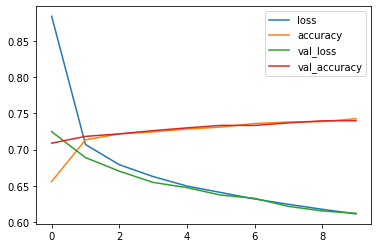

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = model.predict(X_valid)

8625/8625 [==============================] - 13s 2ms/step


In [ ]:
#validation accuracy of about 85%
#classification report
print(metrics.classification_report(y_valid, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.68      0.72    100624
           1       0.76      0.83      0.79    134568
           2       0.65      0.88      0.75     16983
           3       0.46      0.01      0.03      1305
           4       0.81      0.07      0.14      4509
           5       0.51      0.19      0.28      8249
           6       0.67      0.64      0.65      9743

    accuracy                           0.74    275981
   macro avg       0.66      0.47      0.48    275981
weighted avg       0.74      0.74      0.73    275981



In [ ]:
# Perform a final evaluation on the best-performing model with test set.
#Which model performed better?

In [ ]:
#neural network performed better